[レコメンドエンジン作成チャレンジコンテスト - DeepAnalytics (https://deepanalytics.jp/compe/45)](https://deepanalytics.jp/compe/45)

締切 - 2017/10/30

## 評価方法

予測精度の評価は、nDCG(normalized discounted cumulative gain)を使用します（右図参照）。この値は、モデルの性能が良いほど大きくなり、1に近くなります。関連度（relevance）はcv（コンバージョン）を3、cl（広告をクリック）を2、pd（商品ページ閲覧）を1、それ以外は0とします。ただしコンバージョンは広告経由のみ評価対象とします。クエリごとの最大推薦数kは22とします。予測値の出力形式についてはダウンロードページの応募用サンプルファイルをご参照ください。また、test.tsvに記載されているすべてのユーザーに対して予測を行ってください。

![](img/img1.png)

## データ説明
#### 学習データ（train.zip）
ファイル形式：tsv形式
データ内容：train_A.tsv, train_B.tsv, train_C.tsv, train_D.tsv
データ説明：train_A.tsv, train_B.tsv, train_C.tsv, train_D.tsvはそれぞれ人材、旅行、不動産、アパレルのデータです。

| カラム | ヘッダ名称 | 説明 | 変数種別 |
|:-:|:-:|:-:|:-:|
|0|user_id|ユーザーID|文字列|
|1|product_id|商品ID|文字列|
|2|event_type|行動種別（コンバージョン:3, クリック:2, 閲覧:1, カート:0）|整数|
|4|ad(cv)|コンバージョンが広告経由か否か。コンバージョンではない場合は-1|-1 または 0 または 1|
|3|time_stamp|タイムスタンプ|yyyy-mm-dd hh:mm:ss.sss|

#### テストデータ（test.tsv） 
ファイル形式：ヘッダ付き、タブ区切り
データ説明：ユーザーIDは*_A、*_B、*_C、*_Dという形になっており、それぞれ人材、旅行、不動産、アパレルを表します。

|カラム|ヘッダ名称|説明|変数種別|
|:-:|:-:|:-:|:-:|
|0|user_id|ユーザーID|文字列|

#### 応募用サンプルファイル（sample_submit.tsv） 
ファイル形式：ヘッダ無し、タブ区切り　※応募ファイルはヘッダ無しとなりますのでご注意ください。
データ説明：(ユーザーID, 商品ID)は(*_A, *_a)、(*_B, *_b)、(*_C, *_c)、(*_D, *_d)という形になっており、それぞれ人材、旅行、不動産、アパレルを表します。

|カラム|ヘッダ名称|説明|変数種別|
|:-:|:-:|:-:|:-:|
|0|なし|ユーザーID|文字列|
|1|なし|該当ユーザーに対して予測した商品の商品ID|文字列|
|2|なし|該当ユーザーにおける該当商品の関連度ランク。数値が小さいほど関連度は高い。|整数|

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd

%matplotlib inline

In [2]:
train_A = pd.read_table('data/train/train_A.tsv')

In [3]:
train_A.head()

,user_id,product_id,event_type,ad,time_stamp
0,0000000_A,00009250_a,1,-1,2017-04-08 12:09:04.629
1,0000000_A,00009250_a,1,-1,2017-04-27 12:55:57.783
2,0000000_A,00014068_a,1,-1,2017-04-08 11:57:53.746
3,0000000_A,00001254_a,1,-1,2017-04-08 12:04:26.008
4,0000000_A,00003316_a,1,-1,2017-04-08 12:05:31.326


In [4]:
train_A[train_A['ad'] != 0].groupby('event_type')['time_stamp'].count()

event_type
0    1286738
1    1981780
2      33414
3      57398
Name: time_stamp, dtype: int64

In [5]:
train_A['time_stamp_datetime'] = train_A['time_stamp'].map(lambda x: pd.to_datetime(x))

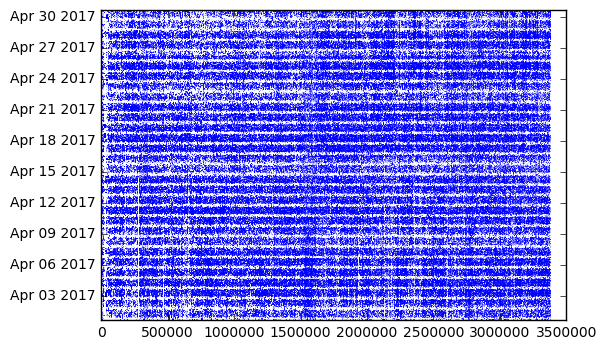

In [18]:
plt.plot(train_A['time_stamp_datetime'],'.',markersize=0.05)

In [19]:
test = pd.read_table('data/test.tsv')

In [23]:
print(test.head())
print(test.tail())

     user_id
0  0000008_A
1  0000719_A
2  0000720_A
3  0001355_A
4  0002685_A
         user_id
11593  0103743_D
11594  0105846_D
11595  0106195_D
11596  0107181_D
11597  0107518_D


In [4]:
d1 = train_A
d1['c'] = train_A['event_type'].map(lambda x: x==3)

product_id
00014118_a     2.0
00014119_a     1.0
00014120_a     3.0
00014121_a    14.0
00014122_a     2.0
Name: c, dtype: float64
5.37725371412
13866
4631


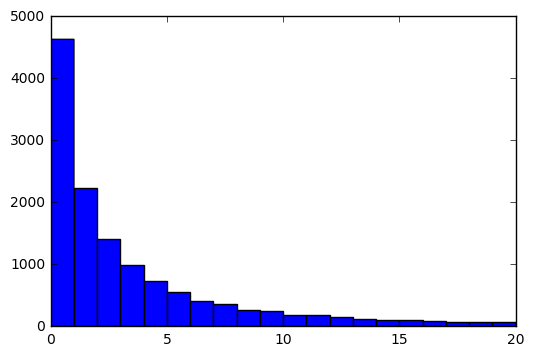

In [19]:
d2 = d1.groupby('product_id')['c'].sum();
plt.hist(d2,bins=d2.max());
plt.xlim([0,20]);
print(d2.tail())
print(d2.mean())
print(len(d2))
print((d2==0).sum())

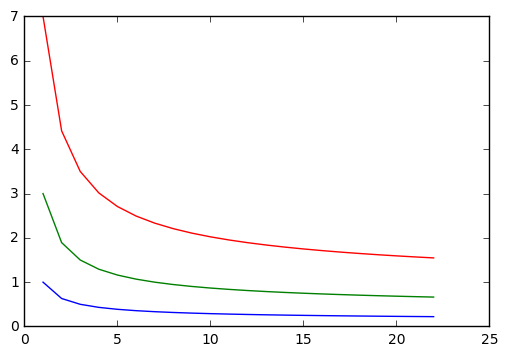

In [13]:
x = np.linspace(1, 22, 22)
plt.plot(x,1/np.log2(x+1));
plt.plot(x,3/np.log2(x+1));
plt.plot(x,7/np.log2(x+1));

#### 9/28
- 協調フィルタリング … サイズ的に微妙？購入したものをまた買うか → 別のモデル
- 似たコンペを探す
- データの様子を目で見る(タイプごとの特徴)　→ 共有
- それぞれの数

人材、旅行、不動産、アパレル

顧客 60k, 20k, ４0k, 100k

商品 14k, 17k, 334k, 790k

- 商品のクラスタリング

- 人気商品を出す
- データ分析(4つ) 次回まで、前日にgithub
- k-meansのkの数(エルボー図)
- 見て傾向が分かる図 → 仮説 → アプローチ
- amazon, googleの手法

In [20]:
train_B = pd.read_table('data/train/train_B.tsv')

In [21]:
train_B

,user_id,product_id,event_type,ad,time_stamp
0,0000000_B,00004491_b,1,-1,2017-04-01 03:57:12.488
1,0000000_B,00004491_b,1,-1,2017-04-01 10:15:21.492
2,0000000_B,00004491_b,1,-1,2017-04-01 03:56:31.945
3,0000000_B,00004491_b,1,-1,2017-04-24 03:36:28.216
4,0000000_B,00009992_b,1,-1,2017-04-01 10:18:00.540
5,0000000_B,00009992_b,1,-1,2017-04-01 10:19:29.957
6,0000000_B,00009992_b,1,-1,2017-04-01 10:19:35.914
7,0000000_B,00009992_b,1,-1,2017-04-15 03:53:46.342
8,0000000_B,00012030_b,1,-1,2017-04-01 10:17:44.207
9,0000000_B,00012030_b,1,-1,2017-04-01 10:15:08.773


In [ ]:
for train in trains:
    plt.plot(train['product_id'].value_counts().value_counts().sort_index());
plt.legend(names);
plt.title(u'製品のアクション数分布');
plt.xlim(0,100);
plt.ylim(0,1000);

In [ ]:
for train in trains:
    plt.plot(map(lambda x: (train['event_type'] == x).sum(), range(4)), '-o')

In [12]:
test = pd.read_table('../data/test.tsv')
test['c'] = test['user_id'].map(lambda x: x[8])
test.groupby('c').count()

,user_id
c,
A,7264
B,2366
C,1648
D,320
